<a href="https://colab.research.google.com/github/les2000les/taba/blob/main/230427_%EC%9D%B4%EB%AF%B8%EC%A7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#object detection


In [ ]:
!pip install torch torchvision cython
!pip install -U "git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-qi_cteuk
  Running command git clone --filter=blob:none --quiet https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-qi_cteuk
  Resolved https://github.com/cocodataset/cocoapi.git to commit 8c9bcc3cf640524c4c20a9c40e89cb6a2f2fa0e9
  Preparing metadata (setup.py) ... done


In [ ]:
import urllib.request
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import torch
import torchvision.transforms as T
from PIL import Image

In [ ]:
# 이미지 -> 새 탭에서 링크 열기
# 이미지 다운로드 코드

url = "https://images.mypetlife.co.kr/content/uploads/2019/08/09153128/shutterstock_119617003-1024x680.jpg"
urllib.request.urlretrieve(url, 'cat_dog.jpg')

('cat_dog.jpg', <http.client.HTTPMessage at 0x7fc84b20f400>)

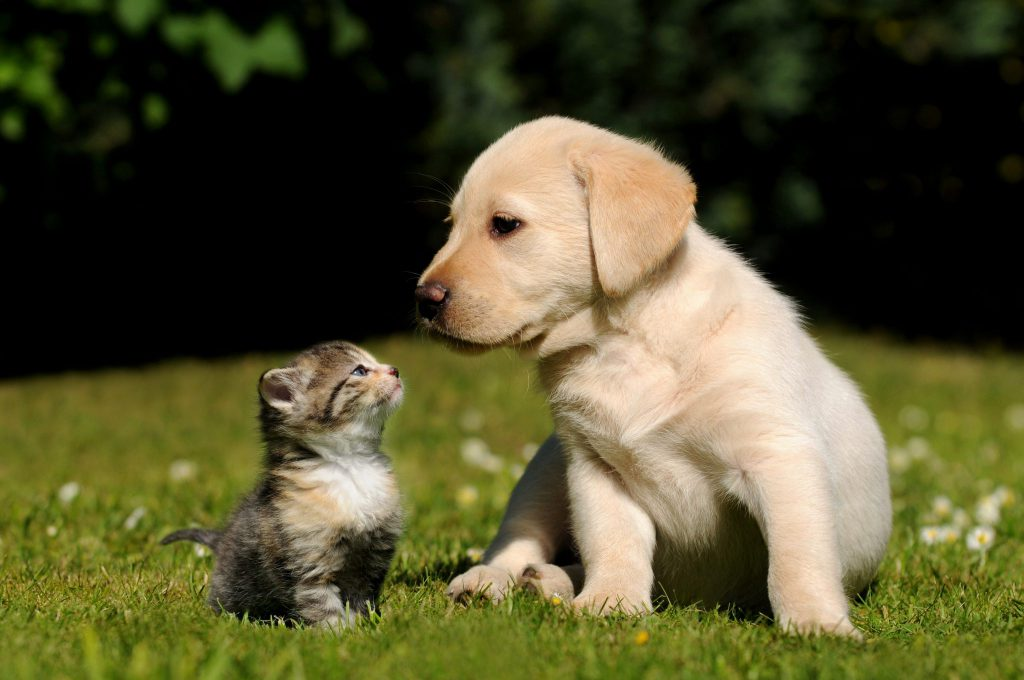

In [ ]:
#이미지를 읽어옴
img = cv2.imread('cat_dog.jpg')
cv2_imshow(img)

In [ ]:
import torch
import torchvision
import torchvision.transforms as T
from PIL import Image


In [ ]:
# 모델 불러오기기
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 108MB/s]


In [ ]:
#입력 이미지를 변환하기 위해 전처리 함수를 정의
transfrom = T.Compose([
    T.ToTensor()
])

In [ ]:
image_path = 'cat_dog.jpg' # 이미지 경로 저장
image = Image.open(image_path) # 이미지 경로를 가져와서 열고
image_tensor = transfrom(image) # 이미지를 tensor로 변환환

In [ ]:
model.eval()
with torch .no_grad(): # 학습을 시키며 이미지를 넣는 게 아니라 모델은 학습되어있고 변환을 안 넣고 이미지에 대한 결과만 확인
  prediction = model([image_tensor])


In [ ]:
print(prediction)

[{'boxes': tensor([[414.1813, 106.0155, 890.8303, 651.6746],
        [155.8007, 341.0039, 409.3992, 626.8248],
        [157.5406, 333.2487, 418.3474, 638.0081],
        [158.3817, 329.2470, 406.1505, 622.2672],
        [413.9753, 167.4789, 897.4895, 638.1754],
        [401.8779, 102.1146, 897.7325, 634.4088],
        [470.2258, 427.0511, 756.4442, 622.9359]]), 'labels': tensor([18, 18, 20, 17, 23, 20, 23]), 'scores': tensor([0.9298, 0.8497, 0.4361, 0.4178, 0.3663, 0.1924, 0.0863])}]


In [ ]:
result = prediction[0]
print(len(result['boxes']))

7


In [ ]:
result = prediction[0].keys()
print(result)

dict_keys(['boxes', 'labels', 'scores'])


In [ ]:
import matplotlib.pyplot as plt
def plot_result(image, prediction, score_threshold = 0.5) : #입력값이 없을 경우 0.5, 다른 값이 들어오면 값이 바뀜
  boxes = prediction[0]['boxes']
  labels = prediction[0]['labels']
  scores = prediction[0]['scores']
  colors = [[1,0,0], [0,1,0], [0,0,1]]

  plt.imshow(image)
  ax = plt.gca()

  for i in range(boxes.shape[0]) : #boxes 요소 개수에 대해 for문
    box = boxes[i]
    label = labels[i]
    score = scores[i]

    if score >= score_threshold: #score가 원하는 기준치를 넘으면 화면에 그림
      color = colors[int(label)%len(colors)]
      text = f"{label} : {score : 2f}"

      ax.add_patch(plt.Rectangle( (box[0], box[1]), box[2]-box[0], box[3]-box[1], fill = False, color = color, linewidth = 2))
      ax.text(box[0], box[1], text, fontsize = 12, color = 'white', bbox = dict(facecolor = color, alpha = 0.5))

  plt.axis('off')
  plt.show()

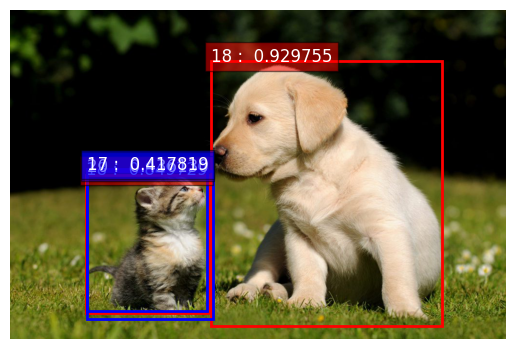

In [ ]:
plot_result(np.transpose(image_tensor.numpy(), (1,2,0)),prediction, 0.4)

#semantic segmentation

In [ ]:
import torch
import torchvisionimport numpy as np
import cv2
import urllib.request

In [ ]:
#미리 학습된 모델 불러오기
model = torchvision.models.segmentation.deeplabv3_resnet50(pretrained = True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth
100%|██████████| 161M/161M [00:01<00:00, 126MB/s]


In [ ]:
model.eval()

DeepLabV3(
  (backbone): IntermediateLayerGetter(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Se

In [ ]:
#입력 데이터 전처리함수 정의

input_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)) #image 색상 정보 정규화화
    
])

In [ ]:
url = 'https://wimg.mk.co.kr/meet/neds/2017/11/image_readtop_2017_728608_15096738513086603.jpg'
urllib.request.urlretrieve(url , 'rest.jpg')

img = cv2.imread('rest.jpg')

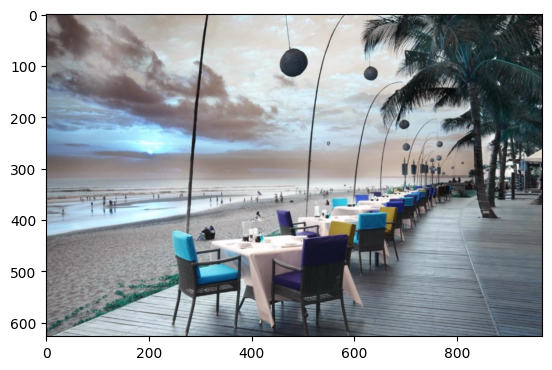

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [ ]:
#전처리 수행
img = input_transforms(img)

In [ ]:
prediction = model(img.unsqueeze(0))
segmentation_mask = prediction['out'][0].argmax(0)

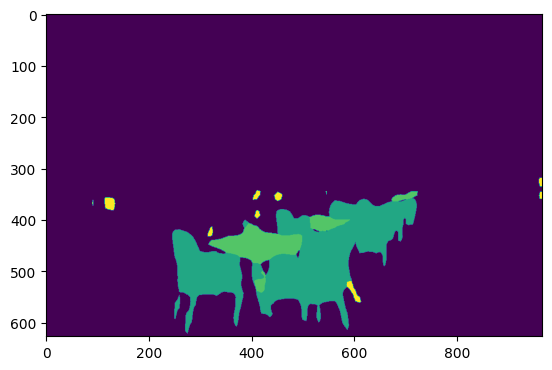

In [ ]:
import matplotlib.pyplot as plt
mask_np = np.array(segmentation_mask)

plt.imshow(mask_np)
plt.show()

#unet

In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.utils.tensorboard import SummaryWriter

import matplotlib.pyplot as plt
from torchvision import transforms, datasets

In [ ]:
class UNet(nn.Module) : 
  def __init__(self):
    super(UNet).__init__() # 부모 클래스에 있는 init 먼저 호출 

    # Convolution + Bathnormalization + ReLU (C, R: 활성화함수)
    def CBR2d( in_channel, out_channel, kernel_size = 3, stride = 1, padding = 1, bias =  True): 
      layers = []
      layers += [nn.Conv2d(in_channel = in_channel, out_channel = out_channel, kernel_size = kernel_size, stride = stride, padding = padding, bias = True)]
      layers += [nn.BatchNorm2d(num_features = out_channel)]
      layers += [nn.ReLU()]

      cbr = nn.Sequential(*layers)
      return cbr
    
    ##Encoding path
    self.enc1_1 = CBR2d(in_channel = 1, out_channel = 64)
    self.enc1_2 = CBR2d(in_channel = 64, out_channel = 64)

    self.pool1 = nn.MaxPool2d(kernel_size = 2)
    ################################################ 
    self.enc2_1 = CBR2d(in_channel = 64, out_channel = 128)
    self.enc2_2 = CBR2d(in_channel = 128, out_channel = 128)

    self.pool2 = nn.MaxPool2d(kernel_size = 2)
    ################################################ 
    self.enc3_1 = CBR2d(in_channel = 128, out_channel = 256)
    self.enc3_2 = CBR2d(in_channel = 256, out_channel = 256)

    self.pool3 = nn.MaxPool2d(kernel_size = 2)
    ################################################ 
    self.enc4_1 = CBR2d(in_channel = 256, out_channel = 512)
    self.enc4_2 = CBR2d(in_channel = 512, out_channel = 512)

    self.pool4 = nn.MaxPool2d(kernel_size = 2)
    ################################################ 
    self.enc5_1 = CBR2d(in_channel = 512, out_channel = 1024)


    ##Decoding path
    self.dec5_1 = CBR2d(in_channel = 1024, out_channel = 512)
    ################################################
    self.unpool4 = nn.ConvTransPose2d(in_channel = 512, out_channel = 512, kernel_size = 2, stride = 2, padding = 0, bias = True)

    self.dec4_2 = CBR2d(in_channel = 2*512, out_channel = 512)
    self.dec4_1 = CBR2d(in_channel = 512, out_channel = 256)
    ################################################
    self.unpool3 = nn.ConvTransPose2d(in_channel = 256, out_channel = 256, kernel_size = 2, stride = 2, padding = 0, bias = True)

    self.dec3_2 = CBR2d(in_channel = 2*256, out_channel = 256)
    self.dec3_1 = CBR2d(in_channel = 256, out_channel = 128)
    ################################################
    self.unpool2 = nn.ConvTransPose2d(in_channel = 128, out_channel = 64, kernel_size = 2, stride = 2, padding = 0, bias = True)

    self.dec2_2 = CBR2d(in_channel = 2*128, out_channel = 128)
    self.dec2_1 = CBR2d(in_channel = 128, out_channel = 64)
    ################################################
    self.unpool1 = nn.ConvTransPose2d(in_channel = 64, out_channel = 64, kernel_size = 2, stride = 2, padding = 0, bias = True)

    self.dec2_2 = CBR2d(in_channel = 2*64, out_channel = 64)
    self.dec2_1 = CBR2d(in_channel = 64, out_channel = 64)


    #흑백이기 때문에 out_channel = 1
    self.fc = nn.Conv2(in_channel = 64, out_channel = 1, kernel_size = 2, stride = 2, padding = 0, bias = True)